In [2]:
# 테스트 libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 차트 한글깨짐 방지
import matplotlib as mp
mp.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False

##### 01. 기준 데이터

In [14]:
print("[미국에서 태어난 년도별 신생아 현황]")
df = pd.read_csv('data/births.csv', index_col=0) # index_col=0 인덱스를 첫번째 열로 사용
df.columns = ['남아수', '여아수'] # 컬럼 변경
df.index.name = '출생년도'        # 인덱스명 지정
display(df.head(2))

[미국에서 태어난 년도별 신생아 현황]


,남아수,여아수
출생년도,,
1880,90993,110491
1881,91954,100745


[문제-01] 남아수 총합을 구하시오.

In [28]:
print("남아 총계: ", df["남아수"].sum())   # 남아 총계
print("여아 총계: ", df.sum()["여아수"])   # 여아 총계

남아 총계:  161802441
여아 총계:  164392696


[문제-02] 여아수 평균을 구하시오.

In [29]:
print("여아수 평균: ",round(df["여아수"].mean(), 2))
print("남아수 평균: ",round(df["남아수"].mean(), 2))

여아수 평균:  1245399.21
남아수 평균:  1225776.07


[문제-03] 남아수가 가장 많은 년도와 남아수를 구하시오.

In [45]:
boy_max = df.남아수.max()
display(df[ df.남아수 == boy_max ][['남아수']])
display(df.query(f'남아수=={boy_max}')[['남아수']])

,남아수
출생년도,
1957,2044160


,남아수
출생년도,
1957,2044160


[문제-04] 2010년도 이후 데이터를 구하시오.

In [50]:
display(df.query('출생년도 >= 2010'))
df.loc[2010:] # 인덱스로 구하기

,남아수,여아수
출생년도,,
2010,1772738,1913851
2011,1753500,1893230


,남아수,여아수
출생년도,,
2010,1772738,1913851
2011,1753500,1893230


[문제-05] 1999 ~ 2000 년도 데이터를 구하시오.

In [53]:
display(df.query('1999 <= 출생년도 <= 2000'))
df.loc[1999:2000]

,남아수,여아수
출생년도,,
1999,1772632,1918809
2000,1814601,1962406


,남아수,여아수
출생년도,,
1999,1772632,1918809
2000,1814601,1962406


[문제-06] 남아출생이 가장많은 top 5 를 구하시오(년도와 남아수)

In [77]:
df1 = df.filter(["출생년도","남아수"])
display(df1.sort_values("남아수", ascending=False).head(5))

sr1 = df['남아수'].nlargest()
pd.DataFrame(sr1)

,남아수
출생년도,
1957,2044160
1959,2023044
1960,2022093
1961,2017316
1958,2010884


,남아수
출생년도,
1957,2044160
1959,2023044
1960,2022093
1961,2017316
1958,2010884


[문제-07] 남아율(%) 컬럼을 추가하고 각년도별 남아수가 차지하는 비율로 데이터로 보여주시오.

In [97]:
df['남아율1'] = round(df.남아수/df.sum(axis=1)*100, 2)
df['남아율2'] = round(df.남아수/(df.남아수+df.여아수)*100, 2)
display(df.head(2))
df.drop(columns=['남아율1','남아율2'], inplace=True)

,남아수,여아수,남아율1,남아율2
출생년도,,,,
1880,90993,110491,45.16,45.16
1881,91954,100745,47.72,47.72


[문제-08] 2000년도 이후 데이터에 대해 출생량 컬럼을 추가
- 남아수가 1800000 이상이면, '많음' 아니면 '적음' 이라고 출력한다.
- 출력: 출생년도, 남아수, 출생량(많음 or 적음)

In [101]:
df1 = df.loc[2000:][['남아수']]
df1['출생량'] = df1.남아수.apply(lambda v: '많음' if v >= 1800000 else'적음')
df1.head(2)

,남아수,출생량
출생년도,,
2000,1814601,많음
2001,1799049,적음


[문제-9] 1800년대, 1900년대, 2000년대 각 남아수, 여아수 평균을 구하시오.

,남아수,여아수
1800년 평균,176714.15,111820.55
1900년 평균,1362901.51,1384145.55
2000년 평균,1831500.58,1978477.50


,1800년 평균,1900년 평균,2000년 평균
남아수,176714.15,1362901.51,1831500.58
여아수,111820.55,1384145.55,1978477.50


<AxesSubplot:>

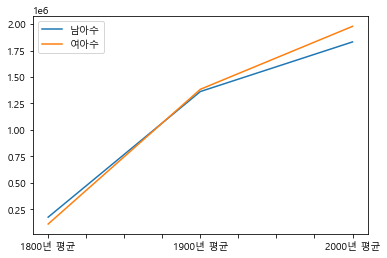

In [119]:
df18 = df.loc[1800:1899][['남아수','여아수']]
df19 = df.loc[1900:1999][['남아수','여아수']]
df20 = df.loc[2000:2099][['남아수','여아수']]

df_sum = pd.DataFrame([df18.mean().round(2),df19.mean().round(2),df20.mean().round(2)])
df_sum.index=['1800년 평균','1900년 평균','2000년 평균']
display(df_sum)

display(df_sum.T)

df_sum.plot()